# AI-Based Landing Zone Safety Classification

This project focuses on classifying drone landing zones as safe or unsafe using terrain and visual features, followed by machine learning classification,and spatial safety analysis to support autonomous landing decisions.


## Project Objectives

- To understand terrain and visual indicators affecting drone landing safety.
- To apply machine learning for safety classification problems.
- To evaluate model reliability using appropriate performance metrics.
- To perform spatial aggregation for landing zone risk mapping.
- To interpret AI outputs for autonomous drone decision-making.


In [ ]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


## Exploratory Data Analysis (EDA)

Basic exploratory data analysis was performed to understand the structure of the dataset, verify feature types, and check for missing values before model training.


In [ ]:
url = "https://raw.githubusercontent.com/vignata-10/AI_based-landing-zone-safety/refs/heads/main/Landing%20Zone%20Dataset.csv"
df = pd.read_csv(url)

## Task 1: Data Understanding

In this task, the dataset is explored to understand its structure, feature types, and statistical properties relevant to drone landing safety.


In [ ]:
df.head()

,slope_deg,roughness,edge_density,ndvi_mean,shadow_fraction,brightness_std,object_density,confidence_score,label
0,10.483571,0.066756,0.099523,0.398224,0.297286,0.067727,0.182327,0.741485,1
1,7.308678,0.105711,0.377215,0.669015,0.057829,0.147740,0.272118,0.837913,1
2,11.238443,0.535800,0.067437,0.438767,0.198451,0.132821,0.140229,0.802620,0
3,15.615149,0.159571,0.182308,0.081362,0.379600,0.124568,0.170602,0.777006,1
4,6.829233,0.122880,0.129803,0.492456,0.110414,0.156328,0.044424,0.885057,1


In [ ]:
df.shape

(3000, 9)

In [ ]:
df.columns

Index(['slope_deg', 'roughness', 'edge_density', 'ndvi_mean',
       'shadow_fraction', 'brightness_std', 'object_density',
       'confidence_score', 'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   slope_deg         3000 non-null   float64
 1   roughness         3000 non-null   float64
 2   edge_density      3000 non-null   float64
 3   ndvi_mean         3000 non-null   float64
 4   shadow_fraction   3000 non-null   float64
 5   brightness_std    3000 non-null   float64
 6   object_density    3000 non-null   float64
 7   confidence_score  3000 non-null   float64
 8   label             3000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 211.1 KB


In [ ]:
df.isnull().sum()

,0
slope_deg,0
roughness,0
edge_density,0
ndvi_mean,0
shadow_fraction,0
brightness_std,0
object_density,0
confidence_score,0
label,0


No missing values were observed in the dataset, indicating it is suitable for model training.


In [ ]:
df.describe()

,slope_deg,roughness,edge_density,ndvi_mean,shadow_fraction,brightness_std,object_density,confidence_score,label
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8.257786,0.287347,0.335261,0.397403,0.245188,0.151231,0.219207,0.775345,0.550000
std,4.729597,0.157635,0.176202,0.229965,0.142418,0.050393,0.130930,0.100204,0.497577
min,0.000000,0.005368,0.000868,0.000004,0.005999,-0.018778,0.004051,0.600259,0.000000
25%,4.862294,0.167848,0.198709,0.196411,0.134075,0.117025,0.120339,0.689372,0.000000
50%,8.121824,0.266516,0.319744,0.398755,0.224382,0.151421,0.196254,0.776927,1.000000
75%,11.367954,0.390529,0.451383,0.589366,0.337315,0.186058,0.298400,0.863509,1.000000
max,27.631189,0.819733,0.901881,0.799831,0.756748,0.314608,0.765969,0.949867,1.000000


## Task 2: Machine Learning Model and Evaluation

In this task, a **Random Forest Classifier** is used to classify landing zones as safe or unsafe based on terrain and visual features. The model is trained using a train–test split, and its performance is evaluated using metrics suitable for safety-critical systems.


In [ ]:
X = df.drop("label", axis=1)
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_model = model.predict(X_test)

In [ ]:
cm_model = confusion_matrix(y_test, y_pred_model)
cm_model

array([[194,  88],
       [ 74, 244]])

In [ ]:
cl_model = classification_report(y_test, y_pred_model)
print(cl_model)

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       282
           1       0.73      0.77      0.75       318

    accuracy                           0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_model))
print("Precision:", precision_score(y_test, y_pred_model))
print("Recall:", recall_score(y_test, y_pred_model))
print("F1 Score:", f1_score(y_test, y_pred_model))

Accuracy: 0.73
Precision: 0.7349397590361446
Recall: 0.7672955974842768
F1 Score: 0.7507692307692307


In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC_AUC_SCORE:", roc_auc)

ROC_AUC_SCORE: 0.7928040947410679


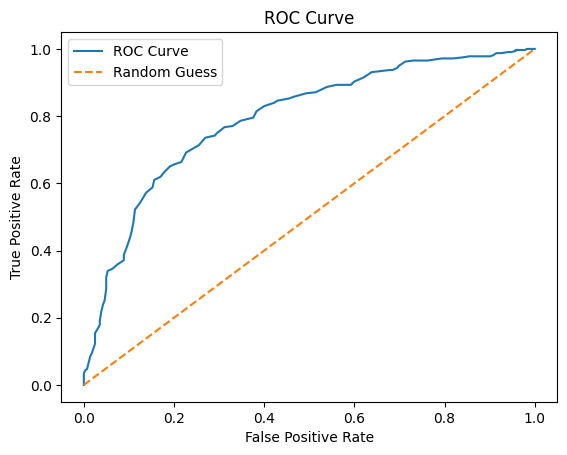

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Why Accuracy Alone Is Not Sufficient

In safety-critical applications such as drone landing, accuracy alone is insufficient because a model can achieve high accuracy while still misclassifying unsafe landing zones as safe. Metrics such as precision, recall, F1-score, and ROC-AUC provide a more reliable evaluation by measuring the model’s ability to correctly identify unsafe zones and assess prediction confidence.


## Task 3: Spatial Safety Analysis and Visualization

In this task, the trained model’s predictions are aggregated across spatial grid tiles to analyze landing safety. A heatmap is generated to visually identify safe, moderate-risk, and unsafe landing zones.


In [ ]:
df["predicted_label"] = model.predict(X)

In [ ]:
df["safety_score"] = model.predict_proba(X)[:, 1]

In [ ]:
grid_size = int(np.sqrt(len(df)))

df["x_coord"] = np.arange(len(df)) % grid_size
df["y_coord"] = np.arange(len(df)) // grid_size

In [ ]:
pivot_table = df.pivot_table(
    values="safety_score",
    index="y_coord",
    columns="x_coord",
    aggfunc="mean"
)

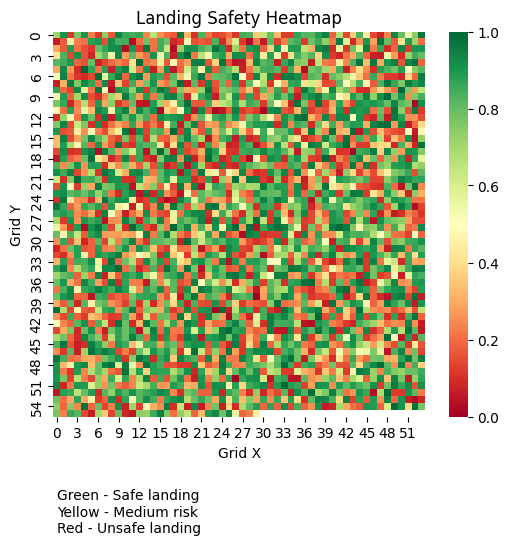

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(pivot_table, cmap="RdYlGn")
plt.title("Landing Safety Heatmap")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.text(
    0.01, -0.3,
    "Green - Safe landing\nYellow - Medium risk\nRed - Unsafe landing",
    transform=plt.gca().transAxes
)
plt.show()

**Interpretation:**  
The heatmap visualizes spatial landing safety across grid-based tiles. Green regions indicate safe landing zones, yellow regions represent moderate-risk areas, and red regions denote unsafe or restricted zones. Spatial aggregation enables region-level safety assessment instead of relying on individual tile predictions.  

A grid-based spatial representation was assumed since explicit geographic coordinates were not available in the dataset.


## Task 4: Drone Autonomy Interpretation

- The drone prioritizes landing in regions with high safety confidence (green areas).
- Unsafe zones (red areas) are strictly avoided.
- Moderate-risk zones (yellow areas) are considered only if no safe region is available.
- If no suitable landing zone is found, fallback strategies such as hovering, repositioning, or aborting the landing are applied.

These strategies ensure safe and reliable autonomous landing decisions based on spatial risk assessment.


## Task 5: Reflection

### Dataset Limitations

- The dataset consists of pre-extracted terrain and visual features rather than raw drone imagery.
- Dynamic environmental factors such as moving obstacles, weather conditions, and lighting changes are not captured.
- The dataset represents static landing zones and does not reflect real-time variations during drone flight.

### Proposed Improvements

- Integrating real-time perception using live drone camera feeds to continuously update landing safety assessment.
- Using multi-view imagery to reduce blind spots and improve spatial understanding of the landing area.
- Incorporating onboard sensing technologies such as LiDAR or depth sensors for accurate terrain elevation and obstacle detection.



## Conclusion

This project presented an AI-based approach for classifying drone landing zones as safe or unsafe using terrain and visual features. A Random Forest classifier was trained and evaluated using safety-relevant performance metrics, followed by spatial safety analysis through heatmap visualization. The results show that spatial aggregation improves decision reliability and supports safe autonomous drone landing. Future integration of real-time perception and onboard sensing can further enhance system performance.
